# Challenge «Mars Town»

### Imports and Prerequsites

Notwendige Import sowie die "Bereinigung" der Daten. Es kann Probleme bei der Systemüberrgreifender Lesung der Daten geben, dem wird im ersten Code-Abschnitt vorgebeugt.

In [29]:
import queue
import nltk
import io
import os
import urllib . request
import huffman # huffman library to create codebooks
import bitstring
from bitstring import BitArray
import numpy as np
import pandas as pd
import sympy
import itertools
import scipy.stats
from scipy.integrate import quad
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [30]:
myfile = open("borchart_draussen_vor_der_tuer.txt","r",  encoding = "ISO-8859-1") 
text1 = myfile.read() 


mycharset = u"\u000A" # unicode of the new line char
mycharset = mycharset + " abcdefghijklmnopqrstuvwxyz"+\
    "ABCDEFGHIJKLMNOPQRSTUVWXYZ"+\
        "0123456789!#$%&'()\"*+,-./:;<=>?@[\]^_`{|}~"+\
            "àæçèéêôëüÄßö\x96äÜÖ«»" 

In [31]:
# Get rid of non - ASCII characters in text 
def clean_non_ascii (text1):
    return ''. join (ch for ch in text1 if ord (ch ) <128)

#### Using the "Natural Language Toolkit: Probability and Statistics" to print some graphs

In [32]:
fdist = nltk.FreqDist(ch.lower() for ch in text1 if ch.isalpha())
fdist = nltk.FreqDist(ch for ch in text1)
most_common_letter = fdist.most_common()

print('Letter frequency')
print(most_common_letter)
print()

# relative frequency
freq = [(100.0*fdist[key]/fdist.N() , key) for key in fdist.keys()] 

print('Sorted letter frequency:')
print(freq)
print()

Letter frequency
[(' ', 16891), ('e', 12761), ('n', 8839), ('i', 6758), ('r', 5459), ('a', 4961), ('t', 4820), ('s', 4546), ('h', 4488), ('d', 3807), ('c', 3141), ('u', 2767), ('l', 2729), ('m', 2378), ('\n', 2180), ('o', 1976), ('g', 1855), ('.', 1842), (',', 1766), ('b', 1586), ('w', 1238), ('k', 1013), ('E', 1007), ('N', 870), ('f', 841), ('D', 818), ('S', 813), ('M', 686), ('A', 674), ('B', 668), ('z', 591), (':', 586), ('K', 535), ('R', 493), ('?', 471), ('!', 467), ('T', 433), ('ü', 428), ('I', 417), ('H', 412), ('v', 402), ('ß', 397), ('W', 389), ('U', 335), ('G', 328), ('ä', 324), ('C', 297), ('p', 284), ('O', 263), ('L', 224), ('ö', 211), ('F', 204), ('J', 189), ('j', 172), ('\x96', 131), ('(', 128), (')', 128), ('V', 97), ('P', 76), ('Z', 73), ('-', 48), ('Ä', 36), ('y', 22), ("'", 20), ('X', 11), ('5', 6), ('q', 5), ('Ü', 5), ('4', 5), ('1', 4), ('x', 4), ('2', 3), ('«', 3), ('»', 3), ('3', 3), (';', 3), ('Ö', 1), ('9', 1), ('Q', 1)]

Sorted letter frequency:
[(0.88452045288

Auszug aus der Buchstabenhäufigkeit mit der Auswertung der via NLTK zur Verfügung stehnden Statistischen Auswertungen. 

#### Plot the results as line graph

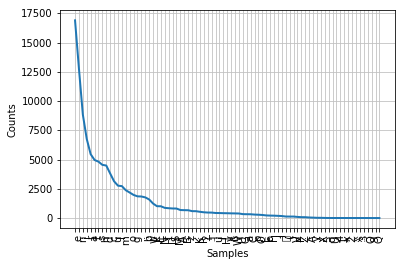

In [33]:
fd = nltk.FreqDist(fdist)
fd.plot(100,cumulative=False)

Graph der Buchstbenhäufigkeiten

#### Plot the results as frequency histogram

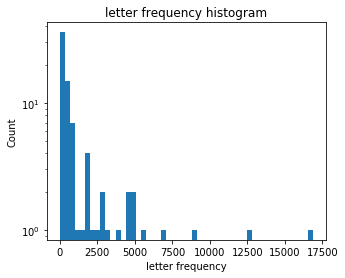

In [34]:
def histfreq(var,label,xlog=False,ylog=False):
    letter_freq = dict()
    for key,val in var.items():
        if val in letter_freq:
            letter_freq[val]+=1
        else:
            letter_freq[val]=1
    a = np.array(list(letter_freq.items()))
    a = a[np.argsort(a[:,0])]
    x, weights = a.T
    plt.figure(figsize=(5,4))
    if ylog:
        plt.yscale('log', nonposy='clip')
    if xlog:
        plt.xscale('log', nonposy='clip')
    plt.hist(x, bins=50, weights=weights)
    plt.title(label+' histogram')
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.show()
    return

letter_fd = nltk.FreqDist(fdist)
histfreq(letter_fd, "letter frequency", False, True)

## Huffman Code

In [37]:

countset = [0 for i in range (0,len(my_charset))] # holds apperances of the characters

for i in range (0,len(text1)):
    singlechar = text1[i]
    for j in range (0,len(my_charset)):
        if my_charset[j] == singlechar:
            countset[j] = countset[j]+1 # count apperance of the characters
            break

totalcount = 0 # holds total of characters in the text file
for i in range (0,len(countset)):
    totalcount = totalcount + countset[i] # how many characters the text contains

probabilityset = [0 for i in range (0,len(my_charset))] # probabilities of the characters

for i in range (0,len(countset)):
    probabilityset[i] = countset[i]/totalcount # appearance probability

huff_dict = {} # probability dictionary

for i in range (0, len(my_charset)):
    if countset[i] != 0: # non zero elements
        huff_dict[str(my_charset[i])] = probabilityset[i] # create dictionary as characters and its probabilities

huff_codebook = huffman.codebook(huff_dict.items()) # create Huffman codebook based on probability and dictionary with Huffman Library

for i in range (0,len(my_charset)):
    if countset[i] != 0: # suppress the zero appearance characters
        print('The character ' + my_charset[i] , ' has ' , '{0:04d}'.format(countset[i]) , ' times appeared. '+\
              'The probability is = ' , '{:.10f}'.format(probabilityset[i]) + ' The Huffman-Lookup is: ' + huff_codebook[str(my_charset[i])]) 

binary_code = ""

for i in range (0, len(text1)):
    binary_code = binary_code + huff_codebook[str(text1[i])] # binary array

binary_file = open('compressed_borchart_draussen_vor_der_tuer.bin', 'wb')

i = 0
while (i < len(binary_code)):
    b = BitArray(bin=binary_code[i:i+8]) # divide array with 8 bits transform into a byte
    b.tofile(binary_file) # write the calculated byte to file
    i = i+8

binary_file.close()

binary_file = open('compressed_borchart_draussen_vor_der_tuer.bin', "rb")
the_binary_file = binary_file.read()
binary_file.close()

newbinary_code = "" # array for decompression of the file

for i in range (0, len(the_binary_file)):
    newbinary_code = newbinary_code + str(bin(the_binary_file[i])[2:].zfill(8)) # tranform bytes into bit array

mynewfile = "" # character array

i=0
while (i < len(newbinary_code)):
    for j in range (0, len(list(huff_codebook.values()))):
        check = list(huff_codebook.values())[j]
        if (newbinary_code[i:i+len(check)] == check): # check the Huffman sequence
            mynewfile = mynewfile + list(huff_codebook.keys())[j] # if found, transform into character and add it to the array
            i = i + len(check)
            break

mynewfile = mynewfile[:-1] # remove new line character at the end of the array

newfile = open("borchart_draussen_vor_der_tuer_new.txt","w")
newfile.write(mynewfile)
newfile.close()
myfile.close()


The character 
  has  2180  times appeared. The probability is =  0.0191485063 The Huffman-Lookup is: 110011
The character    has  16891  times appeared. The probability is =  0.1483657892 The Huffman-Lookup is: 101
The character a  has  4961  times appeared. The probability is =  0.0435760275 The Huffman-Lookup is: 0000
The character b  has  1586  times appeared. The probability is =  0.0139309775 The Huffman-Lookup is: 011010
The character c  has  3141  times appeared. The probability is =  0.0275896598 The Huffman-Lookup is: 01100
The character d  has  3807  times appeared. The probability is =  0.0334396163 The Huffman-Lookup is: 10011
The character e  has  12761  times appeared. The probability is =  0.1120890318 The Huffman-Lookup is: 010
The character f  has  0841  times appeared. The probability is =  0.0073871073 The Huffman-Lookup is: 1000010
The character g  has  1855  times appeared. The probability is =  0.0162937978 The Huffman-Lookup is: 100101
The character h  has  4488

Ausgabe der Häufigkeiten der einzelnen Buchstaben, der Auftrittswahrscheinlichkeit und der dazugehörigen Huffman-Codierung. Die so erechneten Wahrscheinlichkeiten könnten auch als Basis dienen, um die Codierung general für Texte der Deutschen Sprache zur errreichen (siehe beigefügtes PDF). Ich habe an dieser Stelle davon abgesehen, die Huffman-Kodierung mit einer Vielzahl von Texten zu erstellen. 

In [25]:
print (huff_codebook)

{'\n': '110011', ' ': '101', 'a': '0000', 'b': '011010', 'c': '01100', 'd': '10011', 'e': '010', 'f': '1000010', 'g': '100101', 'h': '11100', 'i': '0111', 'j': '000101001', 'k': '1100100', 'l': '00011', 'm': '111101', 'n': '1101', 'o': '110001', 'p': '111100010', 'q': '10001011101000', 'r': '0010', 's': '11101', 't': '11111', 'u': '00110', 'v': '01101101', 'w': '000100', 'x': '100010111011011', 'y': '001111100011', 'z': '11110011', 'A': '0011101', 'B': '0011100', 'C': '111100011', 'D': '1000000', 'E': '1100001', 'F': '100000110', 'G': '00010110', 'H': '10000010', 'I': '10000110', 'J': '001111101', 'K': '11110000', 'L': '100010110', 'M': '0011110', 'N': '1000100', 'O': '110010111', 'P': '0001010001', 'Q': '10001011101100111', 'R': '11001010', 'S': '0110111', 'T': '10001010', 'U': '00010111', 'V': '0011111001', 'W': '00111111', 'X': '0011111000101', 'Z': '0001010000', '1': '100010111011010', '2': '100010111010101', '3': '100010111010100', '4': '00111110001000', '5': '10001011101001', '9'

In [26]:
print (huff_dict.items())

dict_items([('\n', 0.019148506328669178), (' ', 0.14836578917318857), ('a', 0.043576027475471464), ('b', 0.013930977540031798), ('c', 0.02758965980658252), ('d', 0.033439616327175944), ('e', 0.11208903177070981), ('f', 0.007387107257986596), ('g', 0.01629379781636758), ('h', 0.03942132862526022), ('i', 0.059360369618874455), ('j', 0.0015107995818949994), ('k', 0.008897906839881595), ('l', 0.02397076778483403), ('m', 0.020887682591548305), ('n', 0.07763928781610407), ('o', 0.017356627754793713), ('p', 0.002494576053826627), ('q', 4.391859249694766e-05), ('r', 0.04795031928816745), ('s', 0.03993078429822481), ('t', 0.04233752316705754), ('u', 0.024304549087810833), ('v', 0.003531054836754592), ('w', 0.01087424350224424), ('x', 3.513487399755813e-05), ('y', 0.0001932418069865697), ('z', 0.005191177633139213), ('A', 0.005920226268588544), ('B', 0.005867523957592207), ('C', 0.002608764394318691), ('D', 0.007185081732500637), ('E', 0.008845204528885259), ('F', 0.0017918785738754645), ('G', 0

Repräsentativer Auszug aus dem Codebook. 

## Erziehlte Optimierung mit dem oben erstellten Huffman-Codebook:

In [28]:
tot_len = len(text1)
original_size_bits = tot_len * 8
encrypted_size_bits = len(the_binary_file)

print('Original file size:')
print(original_size_bits)
print()
print('Compressend file size:')
print(encrypted_size_bits)
print()
print('We saved {0:.2f}% of the original file size for the texfile "Draussen vor der Tür".'.format((1 - encrypted_size_bits/original_size_bits)*100))

Original file size:
910776

Compressend file size:
68305

We saved 92.50% of the original file size for the texfile "Draussen vor der Tür".


## Part 2

#### Um die Komprimierung weiter zu optimieren und auf "beliebige" Texte skalieren zu können, macht folgender Ansatz Sinn:

Jede Sprache besitzt eine individuelle Häufigkeitsverteilung bei den Buchstaen in beleibigen Texten. Um dies genauer zu betrachten und statistsich auszuwerten eignet sich die Normalverteilung mit folgender Formel:


$$P(x)= \frac { 1 }{ { \sigma \sqrt { 2\pi  }  } } e^{ { { -\left( { x-\mu  } \right) ^{ 2 } }{ \left /{ { { -\left( { x-\mu  } \right) ^{ 2 } }{ 2\sigma ^{ 2 } } } } \right. - }{ 2\sigma ^{ 2 } } } }$$

Diese Formel bemisst die Häufigkeitsverteilung der Buchstaben für beliebige Texte. 

### Vergleich der beiden Text-Ressourcen

In [38]:
text_bochert = pd.read_csv('text.csv', sep=',')
text_people = pd.read_csv('10k-people-raw.csv', sep=';')


In [39]:
def box_plot(dist, title=None):
    chars = [chr(c) for c in range(ord('a'), ord('z') + 1)]
    fig1, ax1 = plt.subplots(figsize=(18, 10))
    ax1.set_xlabel('Character')
    ax1.set_ylabel('Frequency')
    ax1.boxplot(dist, labels=chars)
    ax1.set_ylim([0, 0.3])
    if title is not None:
        plt.title(title)
    plt.show()


def frequency_plot(mean_bochert, mean_people):
    chars = [chr(c) for c in range(ord('a'), ord('z') + 1)]
    ind = np.arange(len(chars))
    width = 1
    frequency = np.log((np.array(mean_bochert) / np.array(mean_people)))
    color = ['g' if f > 0 else 'b' for f in frequency]

    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(ind, frequency, width, color=color)
    ax.set_xticklabels(chars)
    ax.set_xticks(ind + (width * 0.5) - 0.5)
    ax.set_xlabel('Character')
    ax.set_ylim([-2, 2])
    ax.set_ylabel('F')
    ax.set_xlim([-0.5, len(chars) - 0.5])
    ax.text(1, 1.5, 'More frequent in text file "Draussen vor der Tür" ', fontsize=16, bbox={'facecolor': 'green', 'alpha': 0.2, 'pad': 8})
    ax.text(1, 1.2, 'More frequent in 10k-people', fontsize=16, bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 8})
    plt.show()
 


In [40]:
def character_distribution(people):
    dist = np.zeros(shape=(len(people), 26))
    for k in np.arange(1, len(people)):
        d = nltk.FreqDist(ch.lower() for ch in people[k] if ch.isalpha())
        i = 0
        s = 0
        for c in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
                  'u', 'v', 'w', 'x', 'y', 'z']:
            # print(c)
            dist[k, i] = d[c]
            s += d[c]
            # print(d[c])
            i += 1
        dist[k, :] = dist[k, :] / s
        # print(dist[k,:])
    mean = np.mean(dist, axis=0)
    std = np.std(dist, axis=0)
    # dist = np.ones(shape = (len(people), 26))

    return mean, std, dist




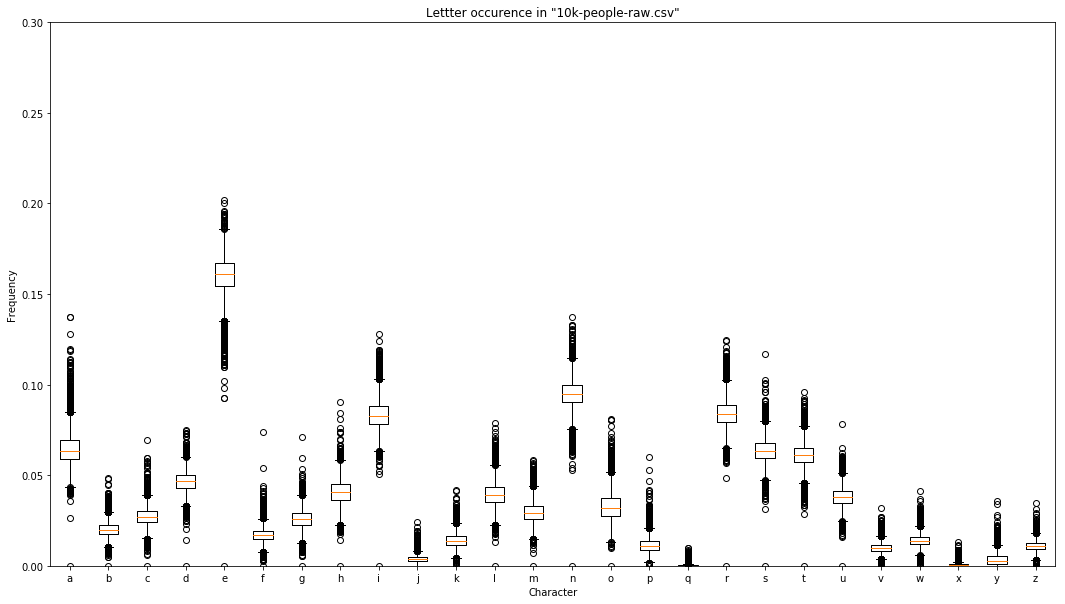

In [41]:
mean_people, std_people, dist_people = character_distribution(text_people['text'])
box_plot(dist_people, 'Lettter occurence in "10k-people-raw.csv"')

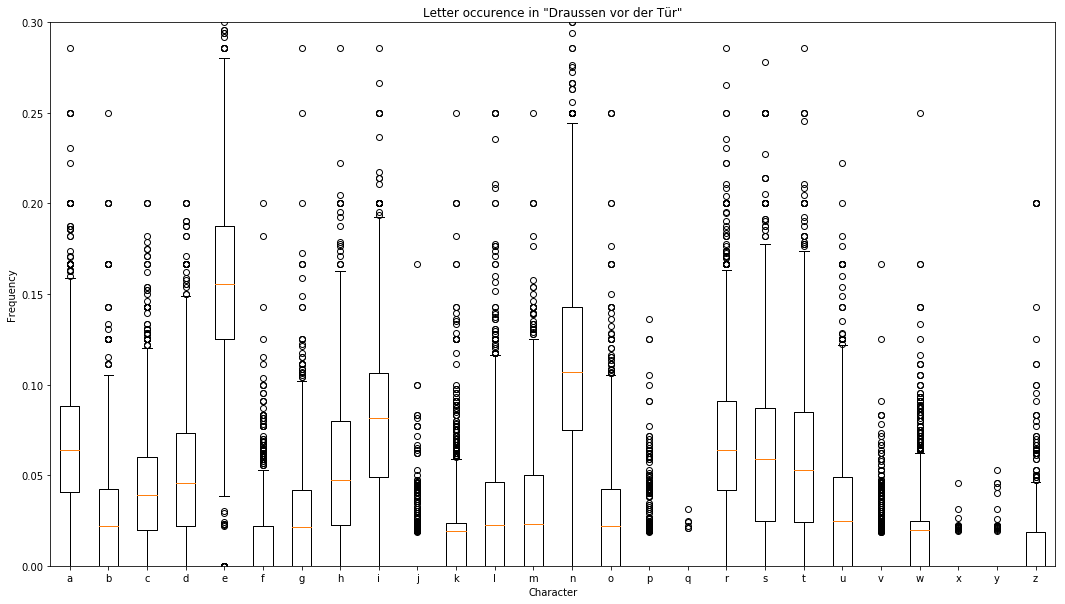

In [42]:
mean_bochert, std_bochert, dist_bochert = character_distribution(text_bochert['text'])
box_plot(dist_bochert, 'Letter occurence in "Draussen vor der Tür"')


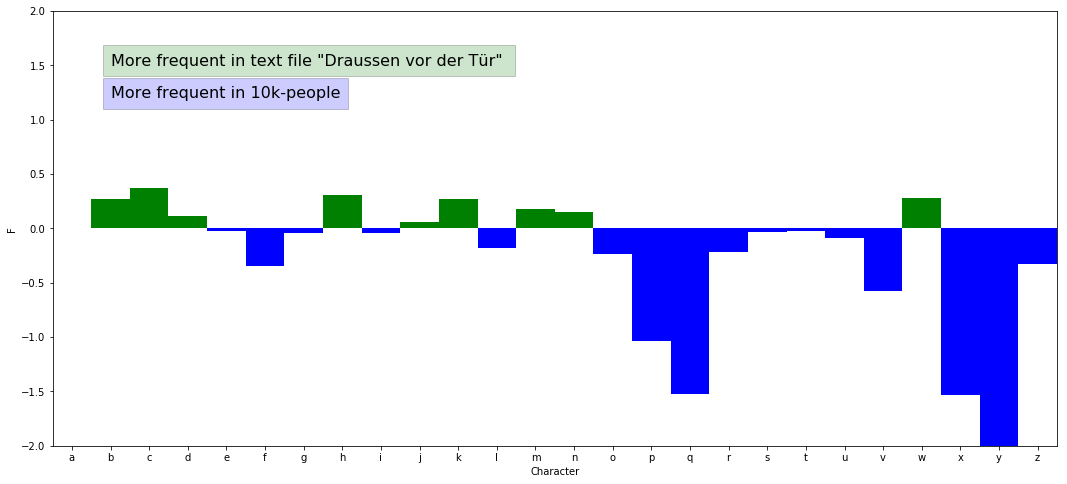

In [43]:
frequency_plot(mean_bochert, mean_people)


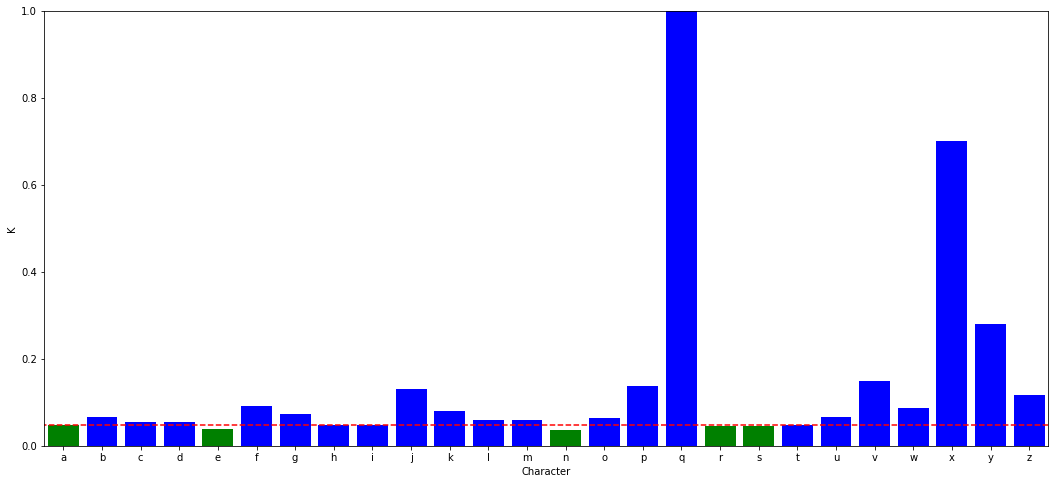

In [44]:

def integrand(x):
    return 1/std_people[i]/std_bochert[i]*sympy.exp(-(x-mean_people[i])**2/2/std_people[i]**2-(x-mean_bochert[i])**2/2/std_bochert[i]**2)

K = []
for i in np.arange(0,26):
     K.append(quad(integrand,0,1)[0])
K_max = max(K)
for i in np.arange(0,26):
     K[i] /= K_max

#print(K)
K_grenze = sorted(K)[4]
#print(K_grenze)


chars = [chr(c) for c in range(ord('a'), ord('z')+1)]
ind = np.arange(len(chars))
width = 1
fig, ax = plt.subplots(figsize = (18, 8))
color = ['g' if k <= K_grenze else 'b' for k in K]
ax.bar(range(0,26),K,color = color)
ax.plot([-1,26], [K_grenze,K_grenze], 'r--')
ax.set_xticklabels(chars)
ax.set_xticks(ind + (width * 0.5) - 0.5)
ax.set_xlabel('Character')
ax.set_ylim([0, 1])
ax.set_ylabel('K')
ax.set_xlim([-0.5, len(chars) - 0.5])
plt.show()